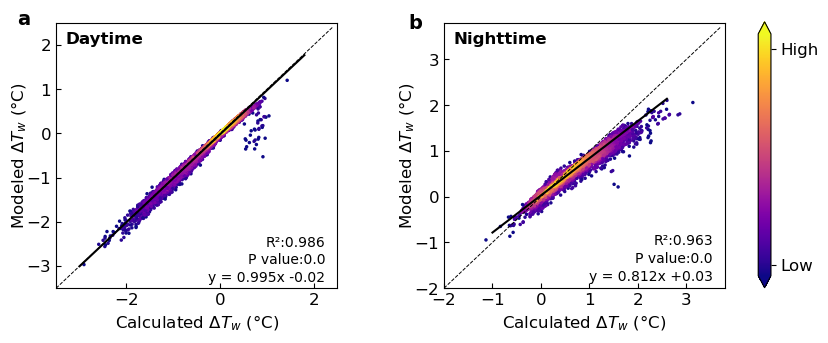

In [1]:
"""
Generate Extended Data Figure 3
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy import stats
import warnings
import netCDF4 as nc
import os
warnings.filterwarnings("ignore")

# FilePath='B:\\HeatStressPaper2022_v2\\Revision2\\Upload_20221130\\Data\\'
FilePath='/home/jguo/research/hw_global/keer_plot/Data'
PartitionTerms=nc.Dataset(os.path.join(FilePath, 'PartitionTerms.nc'))
# PartitionTerms=nc.Dataset('B:\\HeatStressPaper2022_v2\\Revision2\\CodeData\\PartitionTerms.nc')

DayDeltaTw=PartitionTerms.variables['DaytimeDeltaTw'][:]
DaytimeConvectionTerm=PartitionTerms.variables['DaytimeConvectionTerm'][:]
DaytimeAnthropogenicHeatTerm=PartitionTerms.variables['DaytimeAnthropogenicHeatTerm'][:]
DaytimeHeatStorageTerm=PartitionTerms.variables['DaytimeHeatStorageTerm'][:]
DaytimeSolarAbsorptionTerm=PartitionTerms.variables['DaytimeSolarAbsorptionTerm'][:]
DaytimeLongwaveRadTerm=PartitionTerms.variables['DaytimeLongwaveRadTerm'][:]

NightDeltaTw=PartitionTerms.variables['NighttimeDeltaTw'][:]
NighttimeConvectionTerm=PartitionTerms.variables['NighttimeConvectionTerm'][:]
NighttimeAnthropogenicHeatTerm=PartitionTerms.variables['NighttimeAnthropogenicHeatTerm'][:]
NighttimeHeatStorageTerm=PartitionTerms.variables['NighttimeHeatStorageTerm'][:]
NighttimeSolarAbsorptionTerm=PartitionTerms.variables['NighttimeSolarAbsorptionTerm'][:]
NighttimeLongwaveRadTerm=PartitionTerms.variables['NighttimeLongwaveRadTerm'][:]

CalculatedDayDeltaTw=DaytimeConvectionTerm+DaytimeAnthropogenicHeatTerm+DaytimeHeatStorageTerm+DaytimeSolarAbsorptionTerm+DaytimeLongwaveRadTerm
CalculatedNightDeltaTw=NighttimeConvectionTerm+NighttimeAnthropogenicHeatTerm+NighttimeHeatStorageTerm+NighttimeSolarAbsorptionTerm+NighttimeLongwaveRadTerm

# the calculated delta Tw from partition analysis has fewer grids because some
# grids with negative aerodynamic resistence was masked in the partition analysis.
DayDeltaTw=np.ma.array(DayDeltaTw, mask = CalculatedDayDeltaTw.mask)
NightDeltaTw=np.ma.array(NightDeltaTw, mask = CalculatedNightDeltaTw.mask)

# calculate the scatter density for colorization 
Density1 = np.vstack([CalculatedDayDeltaTw.compressed(),DayDeltaTw.compressed()])
Densityz1 = gaussian_kde(Density1)(Density1) 
Density2 = np.vstack([CalculatedNightDeltaTw.compressed(),NightDeltaTw.compressed()])
Densityz2 = gaussian_kde(Density2)(Density2) 
  
size=9
fig = plt.figure(figsize=(8.5, 3.5))
plt.subplot(1,2,1)
plt.scatter(CalculatedDayDeltaTw.compressed(),DayDeltaTw.compressed(),s=size,marker=".",c=np.log(Densityz1),cmap='plasma') # cividis_r gray magma cividis jet
Linear=stats.linregress(CalculatedDayDeltaTw.compressed(),DayDeltaTw.compressed())
b=np.arange(-3,2,0.2)
plt.plot(b, b*Linear[0] + Linear[1],'k',linewidth=1.5)
plt.text(2.25,-3.1+0.8,'R\u00b2:'+str(round(Linear[2]*Linear[2],3)),horizontalalignment='right',verticalalignment='top',color='black')        
plt.text(2.25,-3.1+0.4,'P value:'+str(round(Linear[3],5)),horizontalalignment='right',verticalalignment='top',color='black')            
plt.text(2.25,-3.1,'y = '+str(round(Linear[0],3))+'x '+"{0:+.02f}".format(Linear[1]),horizontalalignment='right',verticalalignment='top',color='black')#,fontsize=11,fontweight='bold' 
plt.text(-4.2,2.8,'a',horizontalalignment='center',verticalalignment='top',fontsize=14,weight='bold')         

plt.xlim((-3.5,2.5))
plt.ylim((-3.5,2.5))
a=np.arange(-3.5,2.5,0.1)
plt.tick_params(axis='both',labelsize=14,direction='in')
plt.plot(a, a,'k--',linewidth=0.7)
plt.xlabel('Calculated '+r'$ΔT_{w}$'+' (°C)', fontsize=12)
plt.ylabel('Modeled '+r'$ΔT_{w}$'+' (°C)', fontsize=12,labelpad=-2)
plt.text(-3.3,2.3,'Daytime',horizontalalignment='left',verticalalignment='top',fontsize=12,weight='bold')         
plt.xticks(fontsize=12);plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sc=plt.scatter(CalculatedNightDeltaTw.compressed(),NightDeltaTw.compressed(),s=size,marker=".",c=np.log(Densityz2),cmap='plasma') # hsvplasma magma  gray viridis
Linear=stats.linregress(CalculatedNightDeltaTw.compressed(),NightDeltaTw.compressed())
b=np.arange(-1,2.8,0.2)
plt.plot(b, b*Linear[0] + Linear[1],'k',linewidth=1.5)
b=np.arange(-1,3,0.2)
plt.text(3.55,-1.6+0.8,'R\u00b2:'+str(round(Linear[2]*Linear[2],3)),horizontalalignment='right',verticalalignment='top',color='black')        
plt.text(3.55,-1.6+0.4,'P value:'+str(round(Linear[3],5)),horizontalalignment='right',verticalalignment='top',color='black')            
plt.text(3.55,-1.6,'y = '+str(round(Linear[0],3))+'x '+"{0:+.02f}".format(Linear[1]),horizontalalignment='right',verticalalignment='top',color='black')#,fontsize=11,fontweight='bold' 
plt.text(-2.6,4,'b',horizontalalignment='center',verticalalignment='top',fontsize=14,weight='bold')         

plt.tick_params(axis='both',labelsize=14,direction='in')
plt.xlim((-2,3.8))
plt.ylim((-2,3.8))
a=np.arange(-2,3.8,0.1)
plt.plot(a, a,'k--',linewidth=0.7)
plt.xlabel('Calculated '+r'$ΔT_{w}$'+' (°C)', fontsize=12)
plt.ylabel('Modeled '+r'$ΔT_{w}$'+' (°C)', fontsize=12,labelpad=-2)
plt.text(-1.8,3.6,'Nighttime',horizontalalignment='left',verticalalignment='top',fontsize=12,weight='bold')            
plt.xticks(np.arange(-2,3.1,1),fontsize=12);plt.yticks(fontsize=12)

cbar_ax2 = fig.add_axes([0.91, 0.17, 0.015, 0.76])
cbar2 = fig.colorbar(sc, cax=cbar_ax2, orientation="vertical", extend="both", ticks=[-4.5, 2.7])
cbar2.ax.tick_params(labelsize=12) 
cbar2.ax.set_yticklabels(['Low', 'High'])

plt.subplots_adjust(top=0.927,
bottom=0.169,
left=0.084,
right=0.871,
hspace=0.225,
wspace=0.38)
# plt.savefig(FilePath+'\\EDFigure3.png', dpi=600)
# plt.savefig(FilePath+'\\EDFigure3.eps')
# plt.close()
